<a href="https://colab.research.google.com/github/PartyForYou/MachineLearningProgramming/blob/main/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

너무 많은 데이터로 인해 저장공간이 부족한 경우, 군집이나 분류에 영향을 끼치지 않으면서 데이터의 용량을 줄여보자

**차원 축소**

차원이란?

다차원 배열과 1차원 배열에서 차원이란 용어는 조금 다르게 사용

다차원 배열에서 차원은 배열의 축 개수

1차원 배열에서 차원은 원소의 개수 -> 혼란을 피하기 위해 특성이라 하기로 하자

특성이 많으면?

장점: 선형 모델의 성능이 높아짐

단점 1: 훈련 데이터에 쉽게 과대적합됨

단점 2: 데이터 용량이 급격히 증가하여 저장 공간이 부족

단점 3: 모델 처리속도가 떨어짐


---

차원 축소는 데이터를 가장 잘 나타내는 일부 특성만을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있음

줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음


주성분 분석(PCA)

대표적인 차원 축소 알고리즘

데이터에 있는 분산이 큰 방향을 찾는 것

분산은 데이터가 널리 퍼져있는 정도

분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터 (데이터를 표현하는데 적합)

## PCA 클래스

In [27]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 02:21:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 02:21:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 02:21:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

주성분 분석 알고리즘은 sklearn.docomposition 모듈 아래 PCA 클래스를 import하여 사용할 수 있음

In [28]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

n_components: 주성분의 개수를 지정하는 데 필수로 사용해야 하는 매개변수

첫 번째 차원은 50, 즉, 50개의 주성분을 찾음

두 번째 차원은 항상 원본 데이터의 특성 개수와 같으므로 10000

주의할 점: 주성분 벡터의 크기는 원본 데이터와 동일함

In [30]:
print(pca.components_.shape)

(50, 10000)


주성분을 이미지처럼 출력해보자

이전 절에서 만든 draw_fruits()

In [31]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    # ratio: figsize 지정, 기본값은 1
    n = len(arr)    # n은 샘플 개수입니다
    # ceil: 올림
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

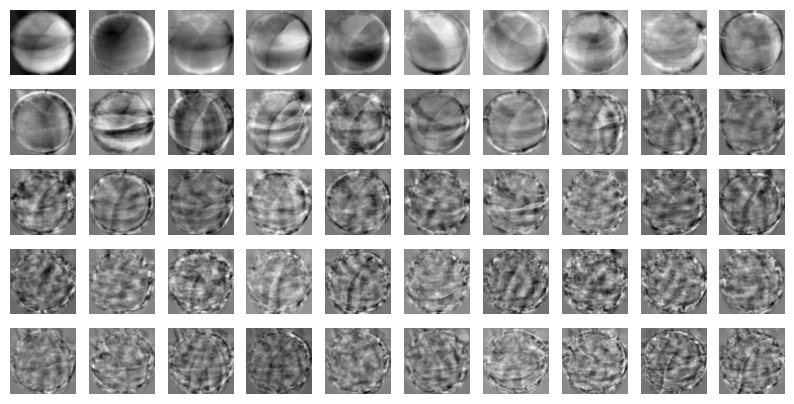

In [32]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄

데이터 세트에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음

찾아낸 주성분을 이용하여 원본 데이터의 특성을 50으로 줄여보자

In [33]:
print(fruits_2d.shape)

(300, 10000)


In [34]:
fruits_pca = pca.transform(fruits_2d)

In [35]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [36]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [37]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

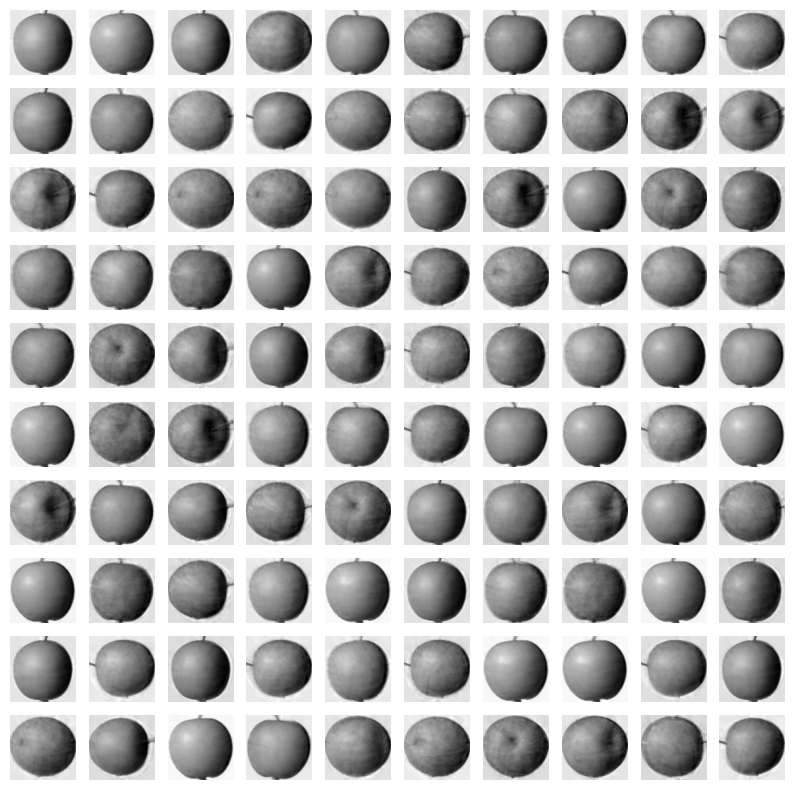

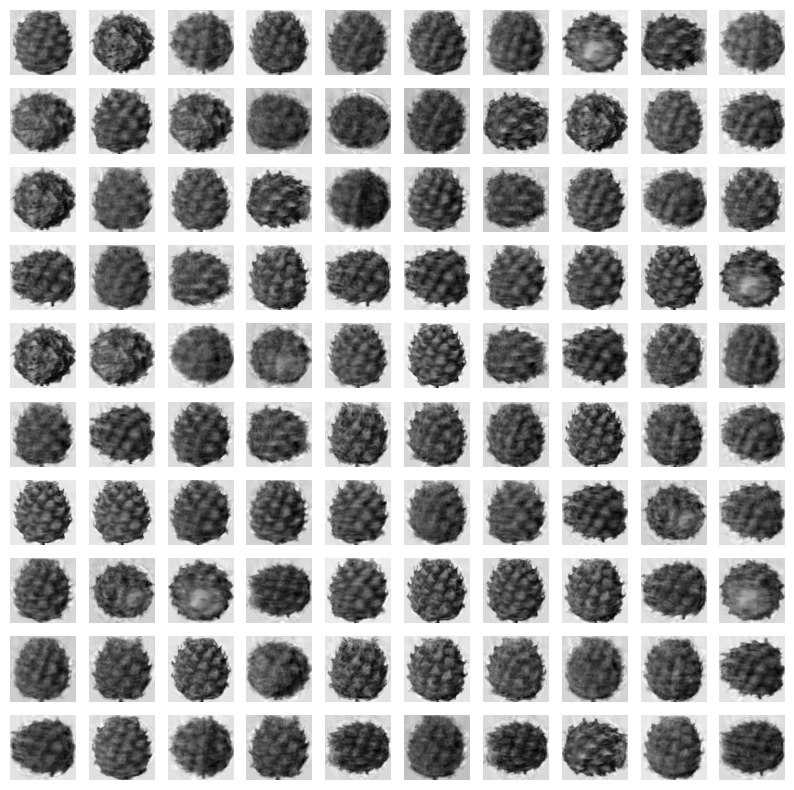

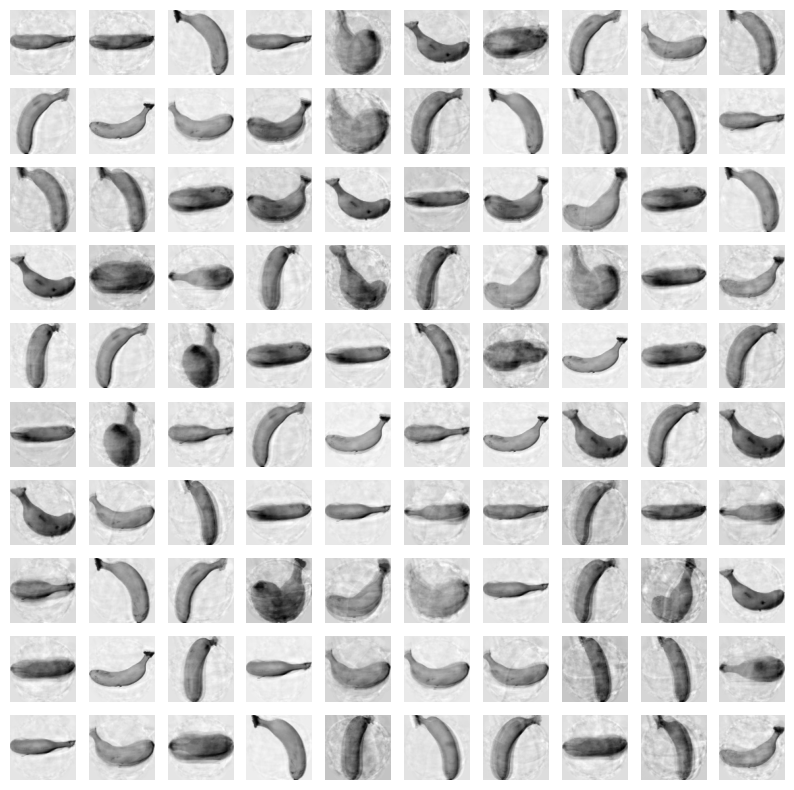

In [38]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

주성분을 최대로 사용하면 거의 완벽하게 원본 데이터를 재구성할 수 있음

## 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음

이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [39]:
print(np.sum(pca.explained_variance_ratio_))

0.921502720826404


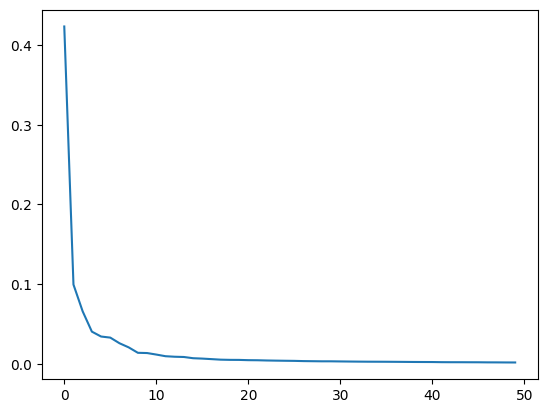

In [40]:
plt.plot(pca.explained_variance_ratio_)

처음 10개의 주성분이 대부분의 분산을 표현하고 있음

## 다른 알고리즘과 함께 사용하기

**과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용하고 차이를 찾아보자**

3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해봄

지도 학습 모델이므로 타깃값을 설정

사과=0, 파인애플=1, 바나나=2

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [42]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [43]:
#원본 데이터인 fruits_2d 사용
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #초 단위

0.9966666666666667
1.8808356285095216


In [44]:
#PCA로 축소한 fruits_pca 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.047965478897094724


PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음


주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음

설명된 분산의 50%에 달하는 주성분을 찾아보자

In [45]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

2
0.5229877245800599


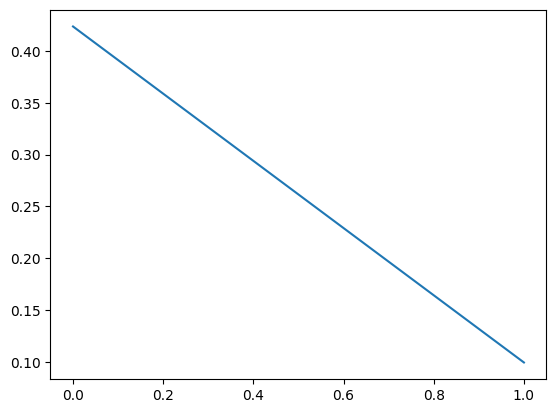

In [46]:
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [56]:
pca = PCA(n_components=0.3)
pca.fit(fruits_2d)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
fruits_pca = pca.transform(fruits_2d)
lr = LogisticRegression(max_iter=1000)
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1
0.423570170015003
0.76
0.028003787994384764


원본 데이터 변환

In [47]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


교차검증 수행

In [53]:
lr = LogisticRegression(max_iter=1000)
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.06508874893188477


차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자

In [49]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [50]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


원본 데이터를 사용했을 때와 거의 비슷한 결과임

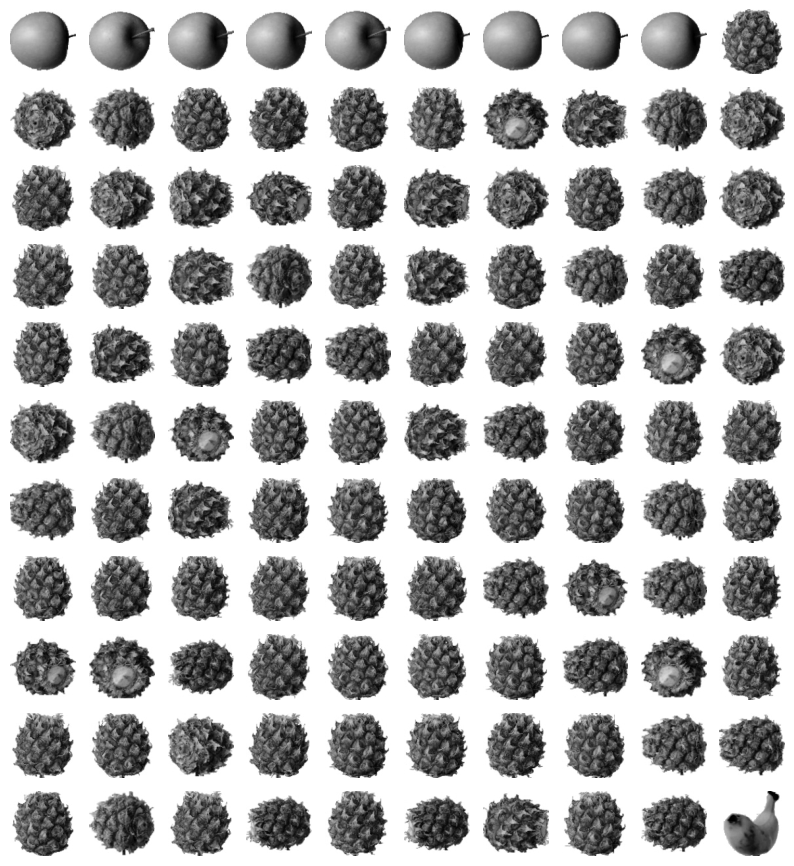

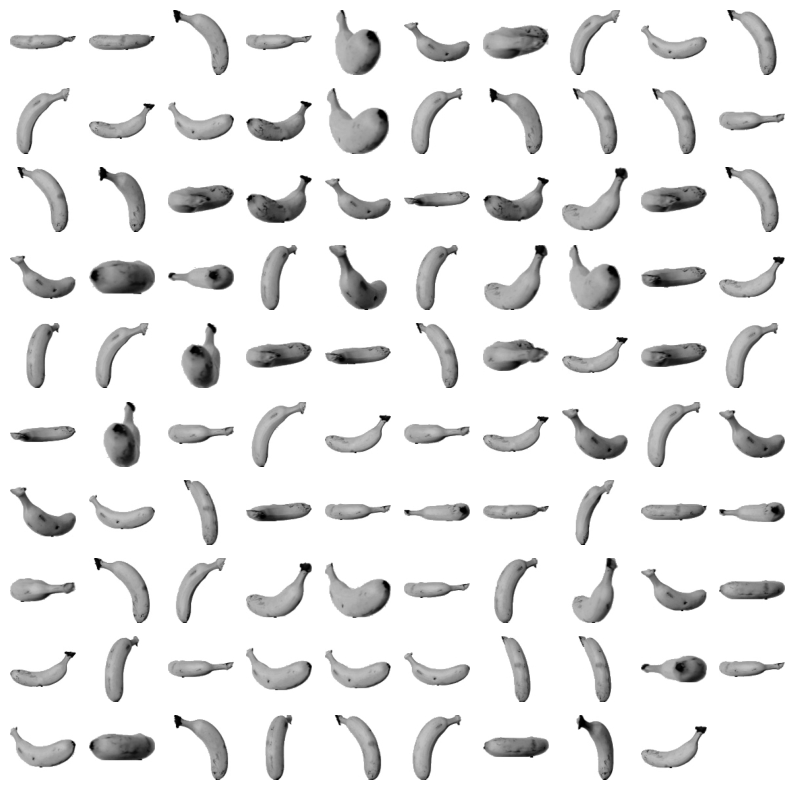

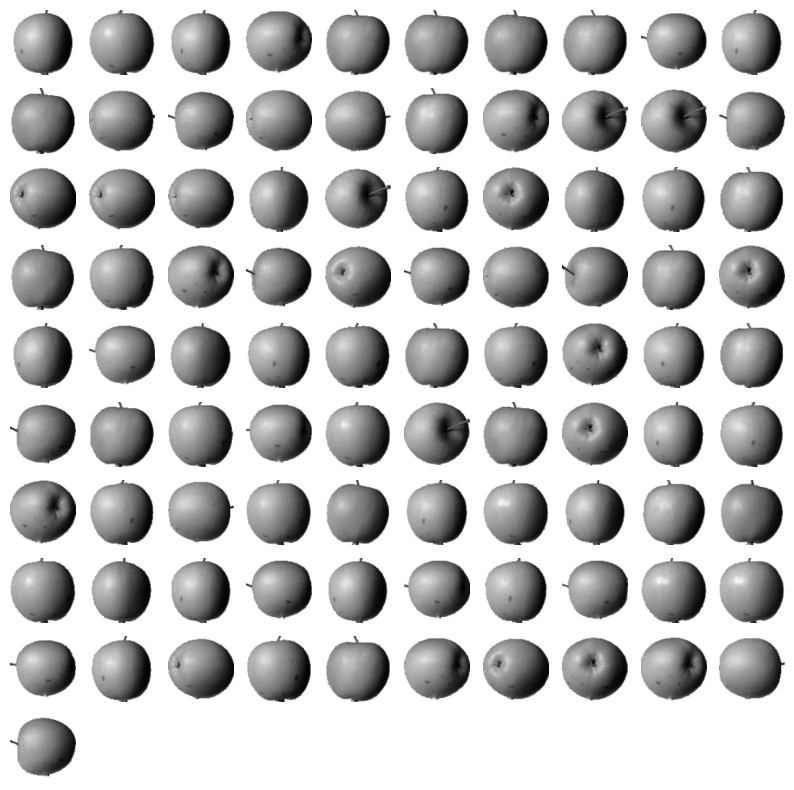

In [51]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

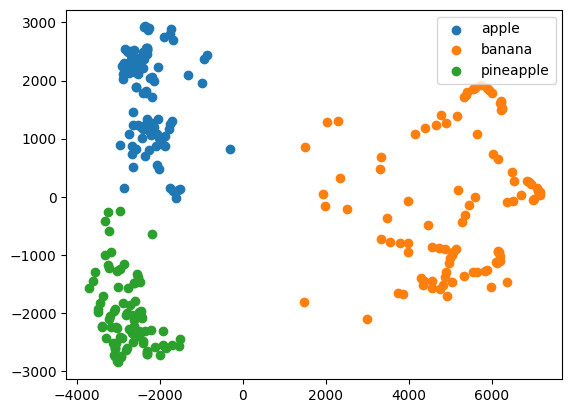

In [52]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 잘 구분됨

데이터를 시각화하면 예상치 못한 통찰을 얻을 수 잇ㅇ므

---

차원축소 장점
  1. 과대적합 억제
  2. 저장 공간 확보
  3. 모델 처리속도 상승
  4. 모델 성능 상승
  5. 시각화 가능